In [16]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib notebook
%matplotlib notebook

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
with open('CXR14_DenseNet.npy','rb') as f:
    X_train_0 = np.load(f)
    y_train_0 = np.load(f)
    filename = np.load(f, allow_pickle=True)
    #labels_0 = np.load(f)
    
filename_prefix = 'CXR14/CXR8/images/extracted/'
    
print(X_train_0.shape)
print(y_train_0.shape)
print(filename)


(112120, 1024)
(112120,)
['00000001_000.png' '00000001_001.png' '00000001_002.png' ...
 '00030803_000.png' '00030804_000.png' '00030805_000.png']


In [3]:

print(filename[0:10])

['00000001_000.png' '00000001_001.png' '00000001_002.png'
 '00000002_000.png' '00000003_001.png' '00000003_002.png'
 '00000003_003.png' '00000003_004.png' '00000003_005.png'
 '00000003_006.png']


In [ ]:
import umap

X_train = X_train_0 
y_train = y_train_0 

np.random.seed(150)
ump = umap.UMAP(n_neighbors=50,
        min_dist=0.1, #paper 0.1
        n_components=2,
        random_state=150,
        metric= 'euclidean')

y_umap = ump.fit_transform(X_train)

plt.figure()
plt.scatter(y_umap[:,0], y_umap[:,1], c=y_train, s=1, cmap='jet')

#cbar = plt.colorbar(boundaries=np.arange(len(classes)+1)-0.5)
#cbar.set_ticks( np.arange( len(classes) ) )
#cbar.set_ticklabels(classes)

<IPython.core.display.Javascript object>


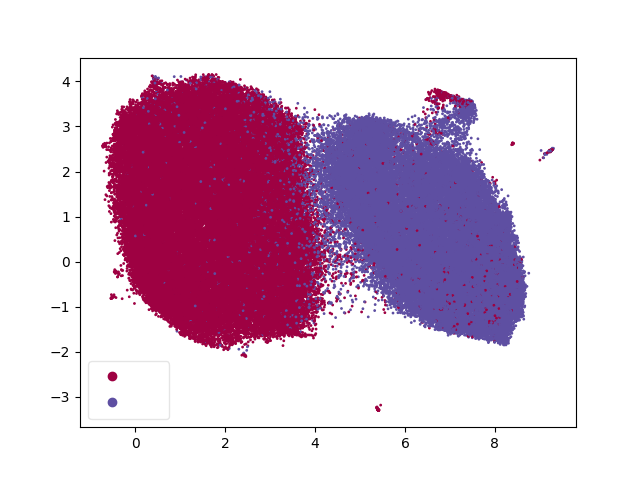

In [19]:
plt.figure()
scatter = plt.scatter(y_umap[:,0], y_umap[:,1], c=y_train, s=1, cmap='Spectral')

classes = ['PA', 'AP']

cls = {}
cls['PA'] = 0
cls['AP'] = 1

lgd = plt.legend(*scatter.legend_elements(),
                    loc="lower left",
                    fontsize=12)
lgd.get_texts()[0].set_text('    ') #PA
lgd.get_texts()[1].set_text('    ') #AP
lgd.get_frame().set_alpha(None)
lgd.get_frame().set_facecolor((0, 0, 1, 0))
lgd.get_frame().set_edgecolor((0,0,0,0.1))

#cbar = plt.colorbar(boundaries=np.arange(len(classes)+1)-0.5, 
#                    fraction=0.02, pad=-0.1,
#                    orientation='horizontal',
#                    panchor=(3.0,3.5))

#plt.xticks([])
#plt.yticks([])
#plt.axis('off')

#cbar.set_ticks( np.arange( len(classes) ) )
#cbar.set_ticklabels(classes)

#plt.savefig('CXR14_colored_new.tif', dpi=1200, transparent=True)


In [7]:
#x=[-0.5,-0.3],y=[-0.4,-0.1]

In [7]:
from imageio import imread 

def get_indexes_within(y_umap,x,y):
    xmin = x[0]
    xmax = x[1]
    ymin = y[0]
    ymax = y[1]
    
    idx1 = (y_umap[:,0] > xmin) & (y_umap[:,0] < xmax)
    idx2 = (y_umap[:,1] > ymin) & (y_umap[:,1] < ymax)
    
    idx = idx1 & idx2
    
    return idx
    

In [26]:
from imageio import imread 

from shutil import copyfile

def plot_within_region(y_umap,filename,x,y,no_of_plots=4, ifPrint=False, 
                       isCopy = False, copyTo = None):

    idxs = get_indexes_within(y_umap,x=x, y=y)
    
    print('Total number of images: ', len(idxs))

    fnames = filename[idxs]
    sub_y_umap = y_umap[idxs]

    print('Total number of points in this region: ', len(fnames))
    
    if isCopy:
        myFile = open(copyTo+'.txt', 'w')
        for i in range(len(fnames)):
            src =  filename_prefix+fnames[i]
            dst = copyTo + '/' + fnames[i]
            #print(src, dst)
            myFile.write(fnames[i]+' ')
            copyfile(src, dst)
        

    #for i in range(len(fnames)):
    #    print(i, fnames[i])
    #print(np.sum(idxs==True), len(filename))
    #print(len(fnames), fnames)

    #images = load_images_from_fnames(fnames)
    #print(len(images))

    imgs_to_plot = 10
    np.random.seed(100)
    idxs2 = np.random.choice(len(fnames), no_of_plots, replace=False)

    print(idxs2)

    plt.figure()

    k = 0
    for i in range(2):
        for j in range(int(no_of_plots/2)):
            plt.subplot(2,int(no_of_plots/2),k+1)
            img = imread(filename_prefix+fnames[idxs2[k]], as_gray=False, pilmode="RGB") 
            plt.imshow(img)
            plt.xticks([])
            plt.yticks([])
            
            
            print(sub_y_umap[idxs2[k]])
            print(fnames[idxs2[k]])
            
            k = k + 1
        
        

Total number of images:  112120
Total number of points in this region:  92
[57 62 26 29]
[9.19344  2.453673]
00008974_001.png
[9.264192 2.475651]
00009644_028.png
[9.257358  2.4767566]
00005192_001.png
[9.302987 2.51638 ]
00005286_001.png


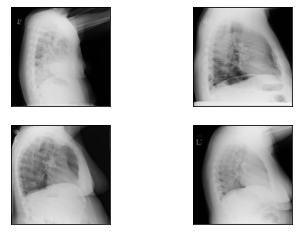

In [9]:
plot_within_region(y_umap,filename,x=[8.8,9.4],y=[2.1,2.7], no_of_plots=4, isCopy=True, copyTo='Lat_92')

plt.savefig('CXR14_lateral.svg', dpi=400)

Total number of images:  112120
Total number of points in this region:  47
[ 6 17 20 43]


<IPython.core.display.Javascript object>


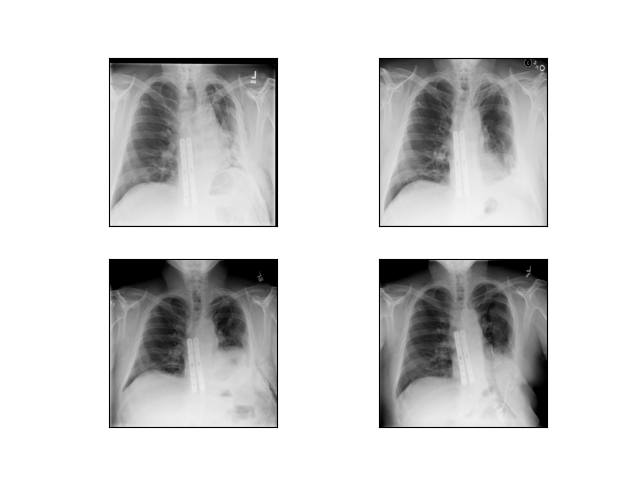

[ 5.4236555 -3.2881358]
00009845_007.png
[ 5.415951  -3.2938776]
00009845_019.png
[ 5.4063325 -3.2949862]
00009845_024.png
[ 5.381654 -3.24421 ]
00009845_053.png


In [29]:
plot_within_region(y_umap,filename,x=[5.2,5.6],y=[-3.4,-3.1], no_of_plots=4, isCopy=True, copyTo='same_patient')

plt.savefig('CXR14_same_patient.svg', dpi=400)

Total number of images:  112120
Total number of points in this region:  20
[17 19 11 18]
[8.400104  2.6156838]
00007034_023.png
[8.398108  2.6195061]
00007034_029.png
[8.38833  2.628108]
00007034_014.png
[8.39683   2.6158664]
00007034_026.png


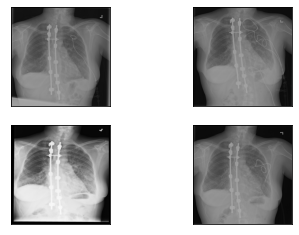

In [10]:
#x=[4.4,4.8],y=[-2.3,-1.9]
plot_within_region(y_umap,filename,x=[8.2,8.5],y=[2.5,2.7])

Total number of images:  112120
Total number of points in this region:  218
[196 208 170 186]
[7.0944824 3.5763543]
00027399_000.png
[7.029806  3.6489599]
00028396_000.png
[6.7464175 3.784609 ]
00020375_003.png
[6.9780107 3.6712391]
00026159_000.png


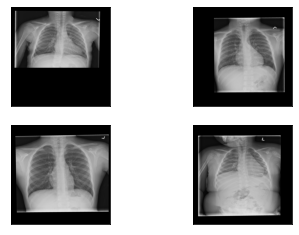

In [11]:
#x=[9.1,9.4],y=[-1.7,-1.3]

plot_within_region(y_umap,filename,x=[6.4,7.1],y=[3.5,3.9])
plt.savefig('CXR14_rect1.svg', dpi=400)

Total number of images:  112120
Total number of points in this region:  229
[ 46 125 182 150]
[6.460774  3.1320827]
00009560_001.png
[6.768383  3.1595778]
00020891_000.png
[6.7587557 3.114442 ]
00022815_063.png
[7.128169 3.181068]
00022815_026.png


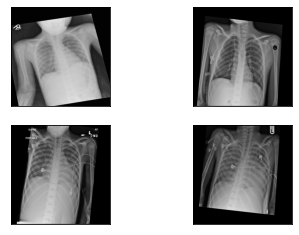

In [12]:
#x=[10.06,10.30],y=[-0.3,-0.05]
plot_within_region(y_umap,filename,x=[6.4,7.2],y=[2.8,3.2])
plt.savefig('CXR14_rect2.svg',dpi=400)

Total number of images:  112120
Total number of points in this region:  73
[56 40 20 55]
[0.49506447 4.049849  ]
00005440_000.png
[0.64399546 3.9562302 ]
00004005_000.png
[0.44525376 4.03792   ]
00002228_000.png
[0.40591243 4.0423884 ]
00005146_001.png


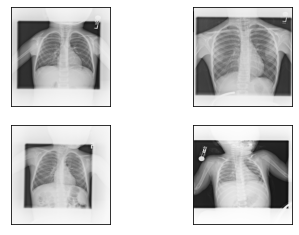

In [13]:
#x=[2.8,3.8],y=[3.50,3.85]
plot_within_region(y_umap,filename,x=[0.3,0.7],y=[3.9,4.2])

Total number of images:  112120
Total number of points in this region:  19
[15 13 17 12]
[-0.3121215 -0.3143503]
00016587_033.png
[-0.40578353 -0.24972889]
00016587_030.png
[-0.44235158 -0.2615956 ]
00016587_035.png
[-0.37311593 -0.22659016]
00016587_029.png


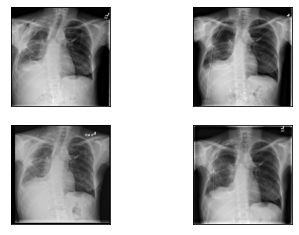

In [14]:
#x=[3.4,3.9],y=[3.05,3.35]
plot_within_region(y_umap,filename,x=[-0.5,-0.3],y=[-0.4,-0.1])